Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

Importing the Data

In [2]:
data = pd.read_csv('./Google_Stock_Price_Train.csv',sep=",")

data = data.loc[:,["Open"]].values
train = data[:len(data)-50]
test = data[len(train):]
train=train.reshape(train.shape[0],1)

Applying MinMax Scaling

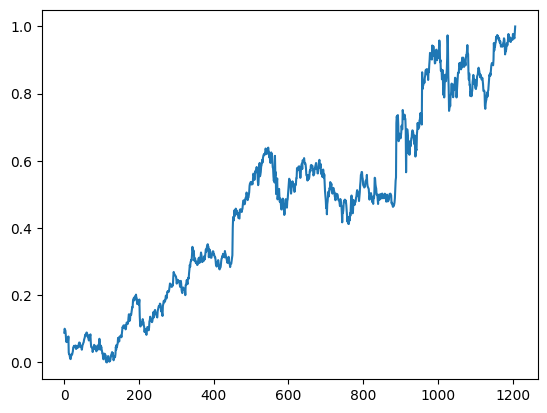

In [3]:
scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(train)

plt.plot(train_scaled)
plt.show()

Spliting and Reshaping

In [4]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

Recurrent Neural Network

In [5]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - loss: 0.4134
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2720
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1806
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1356
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1084
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0985
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0739
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0654
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0581
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0507
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0391
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0383
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0346
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0284
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - 

Extracting Inputs for Prediction

In [6]:
inputs = data[len(data) - len(test) - timesteps:]
inputs = scaler.transform(inputs)

Preparing input sequence for prediction

In [7]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Predicting Stock Prices with RNN

In [8]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


Visualising the Real Stock Price and RNN Predicted Stock Price

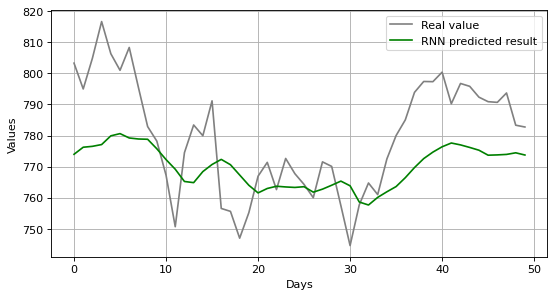

In [26]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="grey",label="Real value")
plt.plot(predicted_data,color="green",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Long Short-Term Memory (LSTM)

In [11]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1158/1158 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0126
Epoch 2/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 9.6191e-04
Epoch 3/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 7.7419e-04
Epoch 4/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 7.7478e-04
Epoch 5/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.5451e-04
Epoch 6/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.2721e-04
Epoch 7/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.7236e-04
Epoch 8/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4.1262e-04
Epoch 9/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.3013e-04
Epoch 10/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.2513e-04
Epoch 11/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.3132e-04
Epoch 12/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.2181e-04
Epoch 13/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.2640e-04
Epoch 14/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss:

Stock Price Prediction using LSTM

In [12]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Visualising Real Stock Price and LSTM Predicted Stock Price

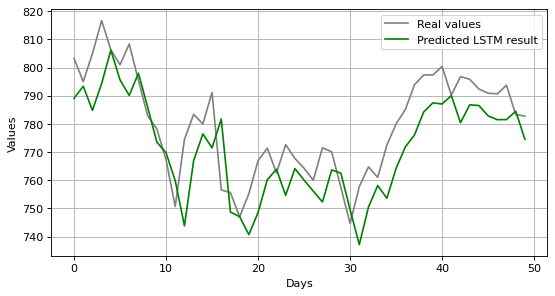

In [25]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="grey",label="Real values")
plt.plot(predicted_data2,color="green",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Comparing LSTM Predicted Stock Price vs RNN Predicted Stock Price

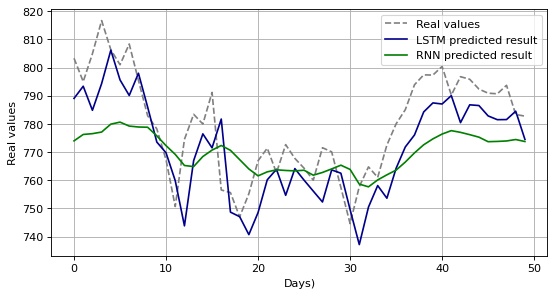

In [28]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="grey", linestyle='dashed',label="Real values")
plt.plot(predicted_data2,color="darkblue", label="LSTM predicted result")
plt.plot(predicted_data,color="green",label="RNN predicted result")
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()

Adjusting hyperparameters for improved RNN prediction accuracy

In [15]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 500, batch_size = 16)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0437
Epoch 2/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0161
Epoch 3/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0101
Epoch 4/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0074
Epoch 5/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0058
Epoch 6/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0049
Epoch 7/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045
Epoch 8/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0043
Epoch 9/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038
Epoch 10/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033
Epoch 11/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0034
Epoch 12/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0030
Epoch 13/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0027
Epoch 14/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026
Epoch 15/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025
E

Predicting Stock Price with Modified RNN

In [16]:
predicted_data_modified = regressor.predict(X_test)
predicted_data_modified = scaler.inverse_transform(predicted_data_modified)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


Visualising Real Stock Price, RNN Predicted Stock Price and RNN Modified Predicted Stock Price

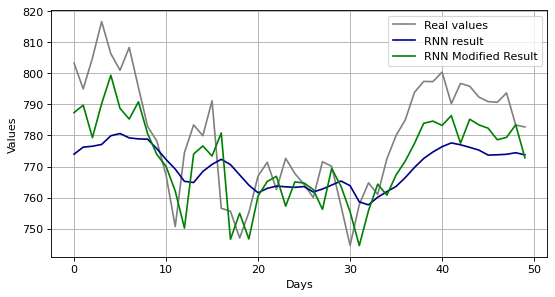

In [29]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="gray",label="Real values")
plt.plot(predicted_data,color="darkblue",label="RNN result")
plt.plot(predicted_data_modified,color="green",label="RNN Modified Result")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Comparing the Real Stock Price with RNN, LSTM and Modified RNN Predictions

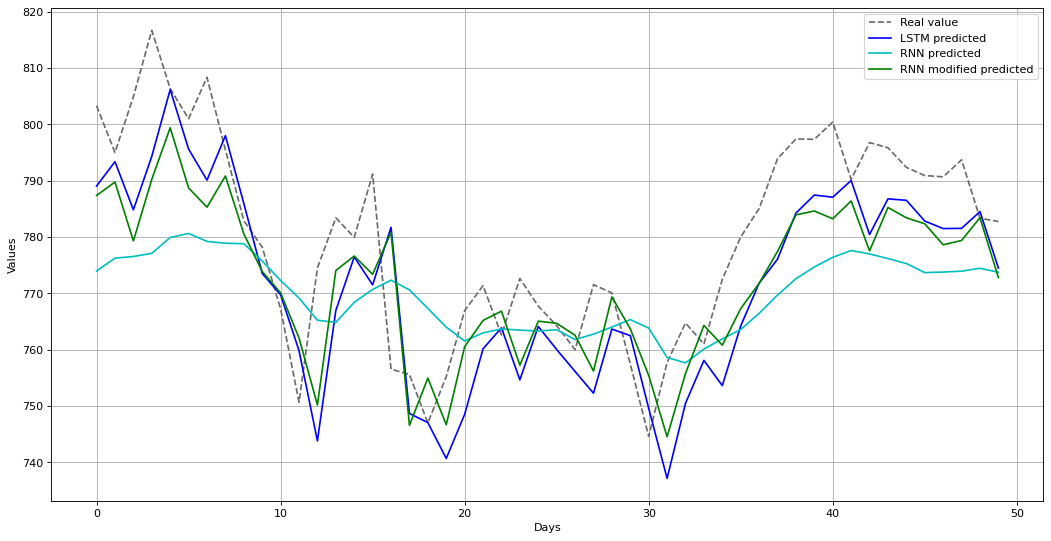

In [30]:
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="DimGray",label="Real value", linestyle="dashed")
plt.plot(predicted_data2,color="blue",label="LSTM predicted")
plt.plot(predicted_data,color="c",label="RNN predicted")
plt.plot(predicted_data_modified,color="green", label="RNN modified predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()